Impement B-spline basis functions. Knots are $t_0≤t_1≤...≤t_n$. 

$$ N_{j,1}(x) = \chi[t_j,t_{j+1})(x) $$
$$ N_{j,k}(x) = \frac{x − t_j}{t_{j+k−1}−t_j} N_{j,k−1}(x) + \frac{t_{j+k}−x}{t_{j+k} − t_{j+1}} N_{j+1,k−1}(x)$$

for $j= 0,...n−k−1$ and $k= 2,...n−1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl

warnings.filterwarnings('ignore')


def bspline_base_functions(t_list, x_list, plot_basefun=False, multiple_outer_knots=False, k_max=None):   
    x_list = x_list.T
    
    if k_max is None:
        k_max = t_list.size-1-1
       
    if multiple_outer_knots:
        t_list = np.concatenate((np.ones((1, k_max))*t_list[0, 0], 
                                 t_list, np.ones((1, k_max))*t_list[-1, -1]), axis=1)
    
    n = t_list.size-1

    # create base functions of first order:
    N = np.logical_and((x_list >= t_list[:, :-1]), (x_list < t_list[:, 1:]))
    
    # create higher order base functions
    for order in range(2, k_max+1):
        # generate vector with t_j+k-t_j for the two denomenators
        du = t_list[:, order-1:] - t_list[:, :-order+1]
        
        j_max = n-order+1
        
        (x_list - t_list[:, :j_max]) / du[:, :-1]
        
        N_part1 = (x_list - t_list[:, :j_max]) / du[:, :-1] * N[:, :-1]
        N_part1 = np.nan_to_num(N_part1)
        N_part1[N_part1 == -np.inf] = 0
        N_part1[N_part1 == np.inf] = 0
    
        
        N_part2 = (t_list[:, n-j_max+1:] - x_list) / du[:, 1:] * N[:, 1:]
        N_part2 = np.nan_to_num(N_part2)
        N_part2[N_part2 == -np.inf] = 0
        N_part2[N_part2 == np.inf] = 0

        N = N_part1 + N_part2;
        
        if plot_basefun:
            plt.figure()
            plt.plot(N)
            plt.title("Order "+str(order))
            
    return N


(a)  What is the complexity of a recursive evaluation in a given point $x$ using this definition? What is the complexity if multiple evaluation of the same term is avoided? Searching the interval $[t_j,t_{j+1})$ containing $x$ is an separate issue.

$$ N_{j,k}(x) = \frac{x − t_j}{t_{j+k−1}−t_j} N_{j,k−1}(x) + \frac{t_{j+k}−x}{t_{j+k} − t_{j+1}} N_{j+1,k−1}(x)$$

Individual recursion step O(1)

for k-th order basis function $ k + k-1 + k-2 + ... + 1 = n(n+1)/2$ --> $O(n^2)$

multiplication and summation of n elements: $O(n)$

$$ O(n^2) + O(n)$$

![title](https://www.programmersought.com/images/818/b8973f93ebfcd2d25f9ca98e49278022.png)

(b)  Plot the basis functions once for knots $t_j=j$, and then for using k multiple knots at both ends, i.e. 

$t_0=...=t_{k−1}$ and $t_{n−k+1}=...=t_n$.

In [1]:
t_list = np.arange(6)[np.newaxis]
x_list = np.linspace(0, 5, 100)[np.newaxis]

bspline_base_functions(t_list, x_list, plot_basefun=True)

N=bspline_base_functions(t_list, x_list, plot_basefun=True, multiple_outer_knots=True)

NameError: name 'np' is not defined

(c)  Plot $\sum_{j=0}^n N_{j,k}$

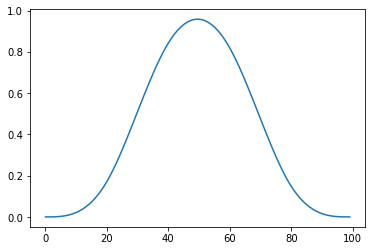

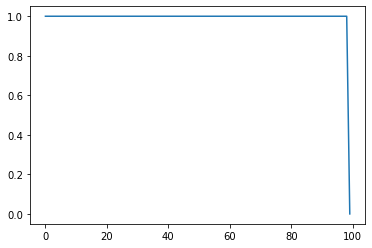

In [3]:
N = bspline_base_functions(t_list, x_list, plot_basefun=False)
N2 = bspline_base_functions(t_list, x_list, plot_basefun=False, multiple_outer_knots=True)


plt.figure()
plt.plot(np.sum(N, axis=1))
plt.figure()
plt.plot(np.sum(N2, axis=1))

# bspline_base_functions(t_list, x_list, plot_basefun=False, multiple_outer_knots=True)

(d)  How do basis functions look like for multiple internal knots ?

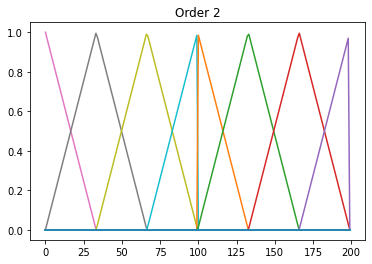

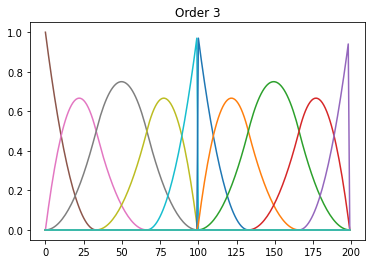

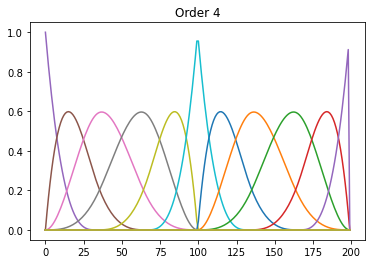

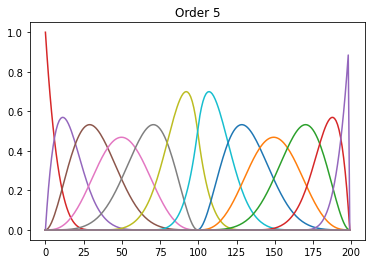

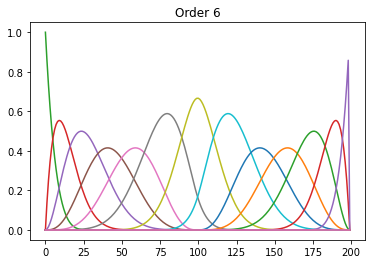

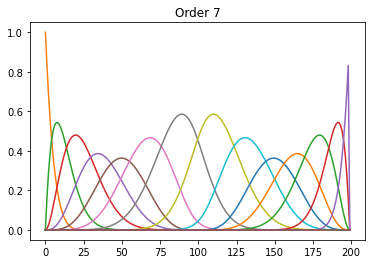

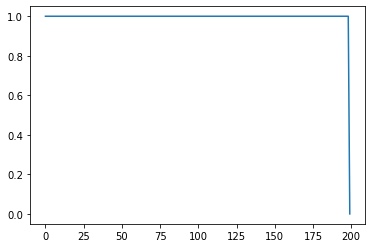

In [4]:
t_list = np.array([[0, 1, 2, 3, 3, 3, 4, 5, 6]])
x_list = np.linspace(0, 6, 200)[np.newaxis]

N = bspline_base_functions(t_list, x_list, plot_basefun=True, multiple_outer_knots=True)
plt.figure()
plt.plot(np.sum(N, axis=1))